#### Name Dipika Sharma
#### DSC 630 T301 Predictive Analytics
#### Week 11 and 12

# Final Project

In [72]:
## Lets import necessary packages

import yellowbrick
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
#from sklearn. Preprocessing import MinMaxScaler
from sklearn import linear_model
## Load required libraries
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import warnings
warnings.filterwarnings("ignore")

In [73]:
import datetime
from datetime import date, timedelta
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')

train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')
#Data = pd.read_csv('TSLA.csv')

## Import data.
Data = pd.read_csv('TSLA.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
Data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2021-09-24,248.630005,258.266663,248.186661,258.130005,258.130005,64119000
2021-09-27,257.706665,266.333344,256.436676,263.786682,263.786682,84212100
2021-09-28,262.399994,265.213318,255.393326,259.186676,259.186676,76144200


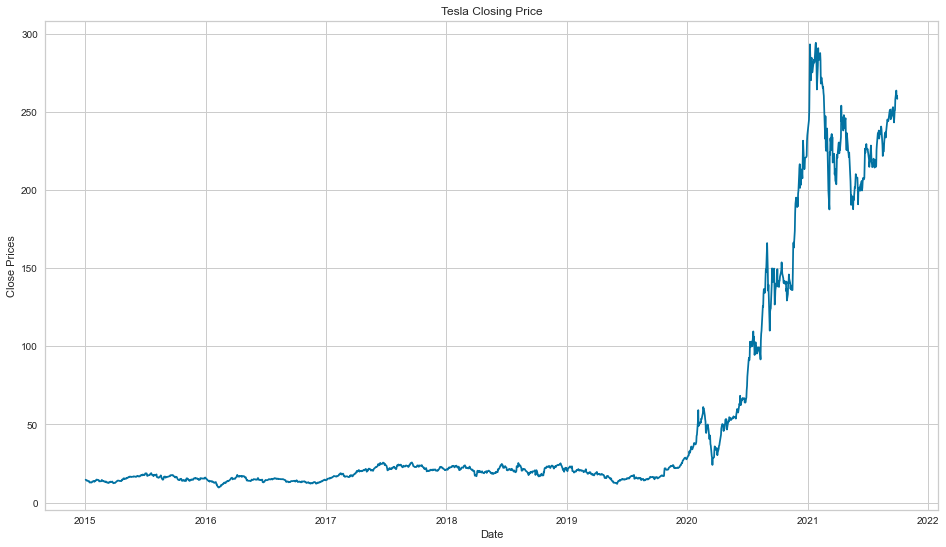

In [74]:
## Lets Visualize the stock’s closing price
plt.figure(figsize=(16,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(Data['Close'])
plt.title('Tesla Closing Price')
plt.show()

#### The above plot looks interesting as it shows that the Tesla closing price fluctuate a lot in last couple of months. The plot show the stock price growth from 2015 to 2021 years. Although the prices went down in 2021 but overall we can see the stock prices keep increasing after 2020 year.

<AxesSubplot:ylabel='Density'>

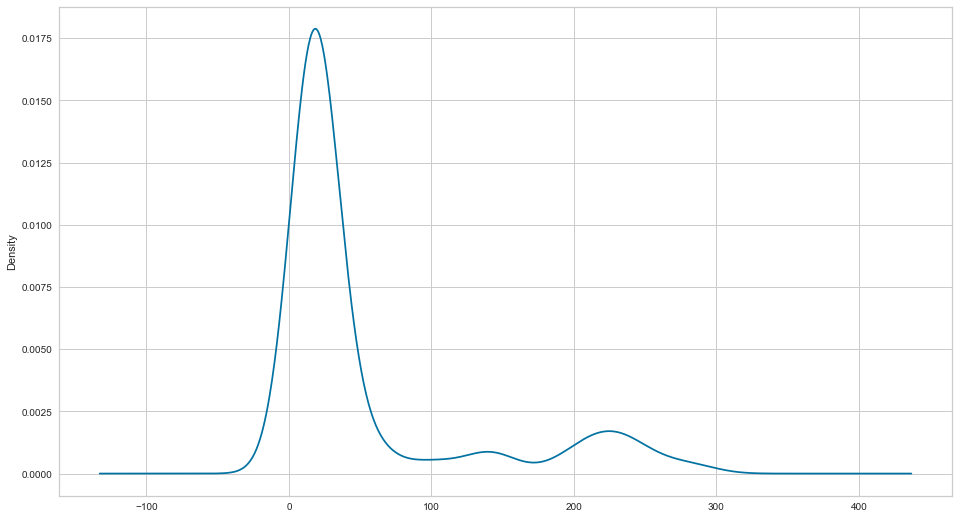

In [75]:
## Lets try the Distribution plot.
plt.figure(figsize=(16,9))
df_close = Data['Close']
df_close.plot(kind='kde')

#### The above graph shows the high probablity of closing price being around 190 0r 260 and low probability of closing price greater than 320.

## Building ARIMA Model

In [76]:
## ADF (Augmented Dickey-Fuller) Test
## Defining the Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(16,9))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


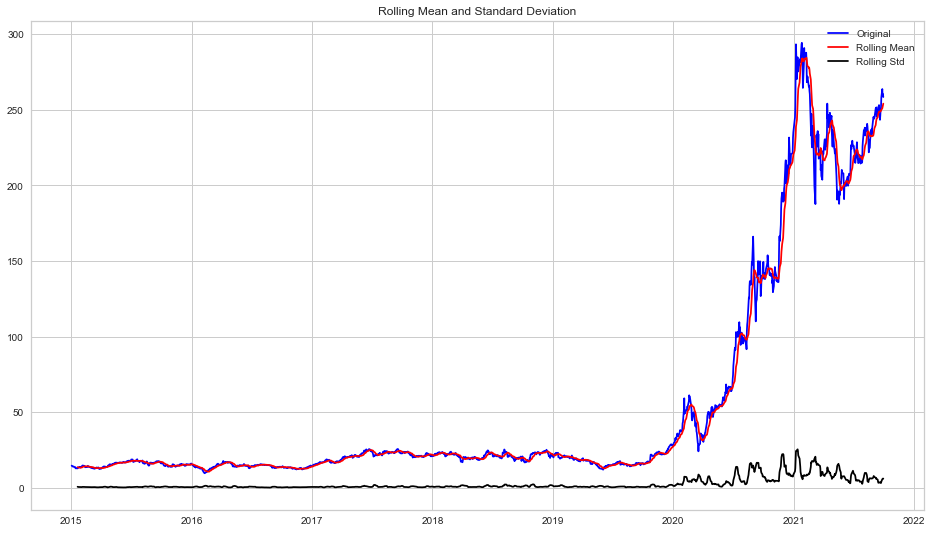

Results of dickey fuller test
Test Statistics                   0.593652
p-value                           0.987458
No. of lags used                 24.000000
Number of observations used    1674.000000
critical value (1%)              -3.434262
critical value (5%)              -2.863268
critical value (10%)             -2.567690
dtype: float64


In [77]:
## Lets check the stationarity on our data.

test_stationarity(df_close)

#### The p value is bigger than 0.05 and hence we cannot rule out the NULL hypothesis. Also we can se that the test statistics is greater than the critical values which mean data is non-linear. hence our data is non-stationary.

<Figure size 432x288 with 0 Axes>

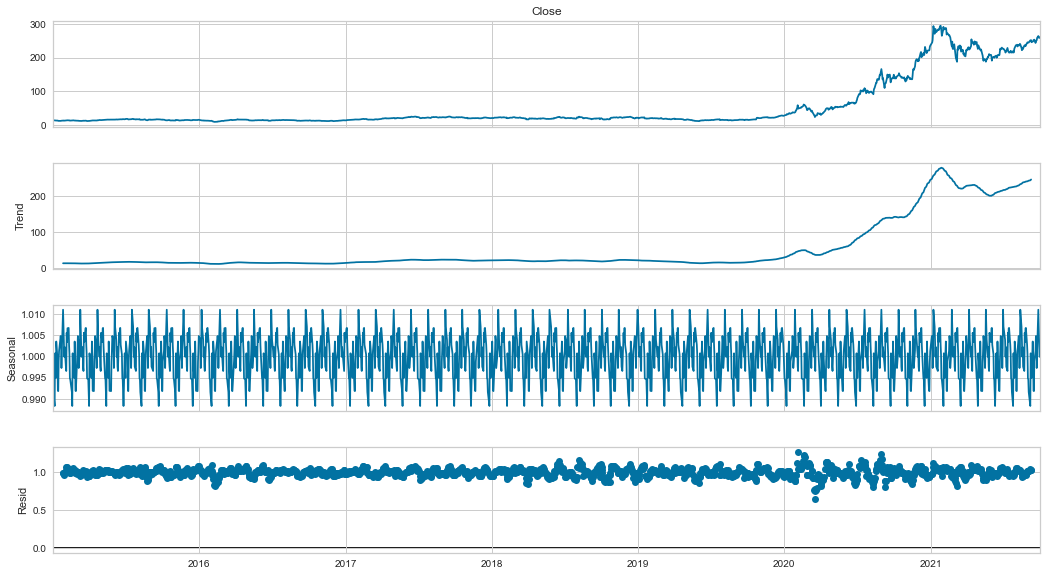

In [78]:
## Seasonality and trend cannot go together for time series analysis.
## In order to separate the trend and the seasonality from a time series, Using decompose

decomposition = seasonal_decompose(df_close, model='multiplicative', period = 30)

fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


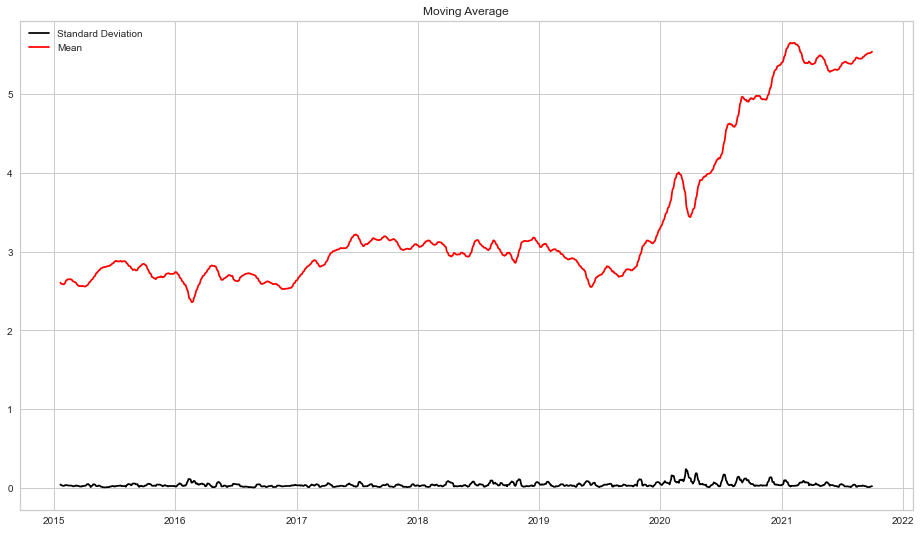

In [79]:
## To eliminate trend or reduce the magnitude, first take the log of the respective column

from pylab import rcParams

df_log = np.log(df_close)

## Next step is find the moving average of the series
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.figure(figsize=(16,9))
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show(block=False)

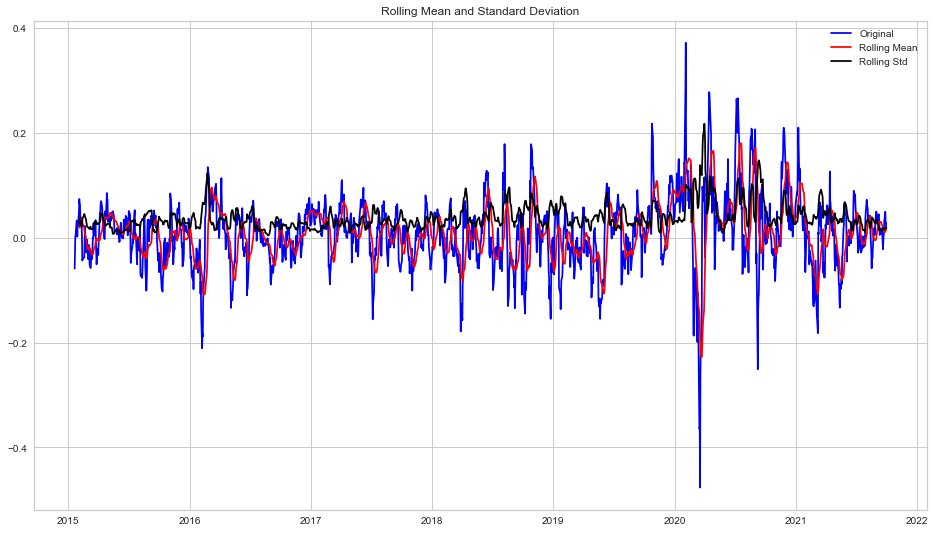

Results of dickey fuller test
Test Statistics               -9.327373e+00
p-value                        9.530174e-16
No. of lags used               1.300000e+01
Number of observations used    1.674000e+03
critical value (1%)           -3.434262e+00
critical value (5%)           -2.863268e+00
critical value (10%)          -2.567690e+00
dtype: float64


In [80]:
## Lets deduct the moving average from the log series and test for stationary

df_log_minus_mean = df_log - moving_avg
df_log_minus_mean.dropna(inplace=True)
test_stationarity(df_log_minus_mean)

#### As we can see now the p value is less than 0.005 and test statistics is smaller than the critical values, this mean, data is now stationary.

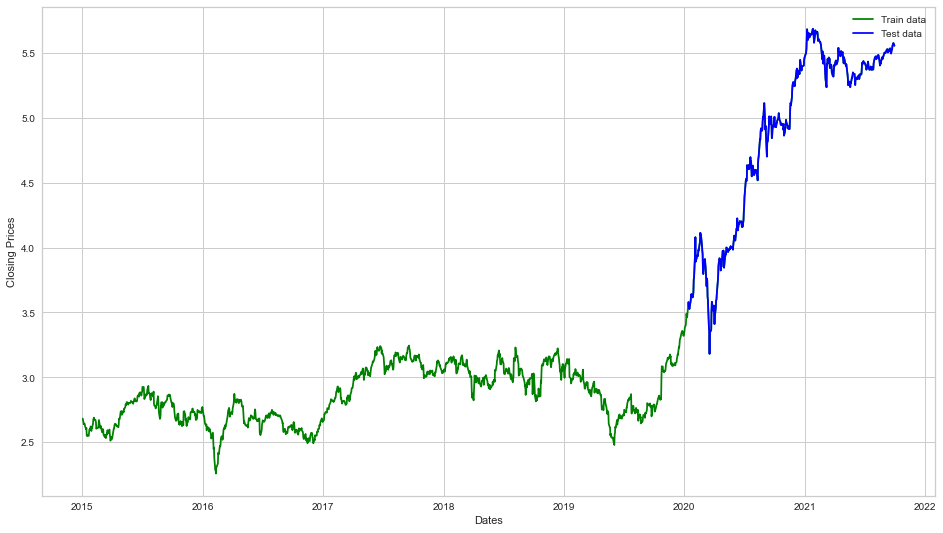

In [81]:
## Assigning the name to Close column in dataframe.

df_log = df_log.to_frame() 
df_log.columns=['Close']

## Lets split the data into train and training set

train_data, test_data = df_log[:int(len(df_log)*0.75)], df_log[int(len(df_log_minus_mean)*0.75):]

## Lets visualize the train and test data sets.

plt.figure(figsize=(16,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5452.106, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5450.171, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5450.168, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5453.234, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5448.108, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.907 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1274
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2727.617
Date:                Tue, 14 Nov 2023   AIC                          -5453.234
Time:                        21:32:39   BIC                          -5448.085
Sample:                             0   HQIC                         -5451.300
                               - 1274                                  

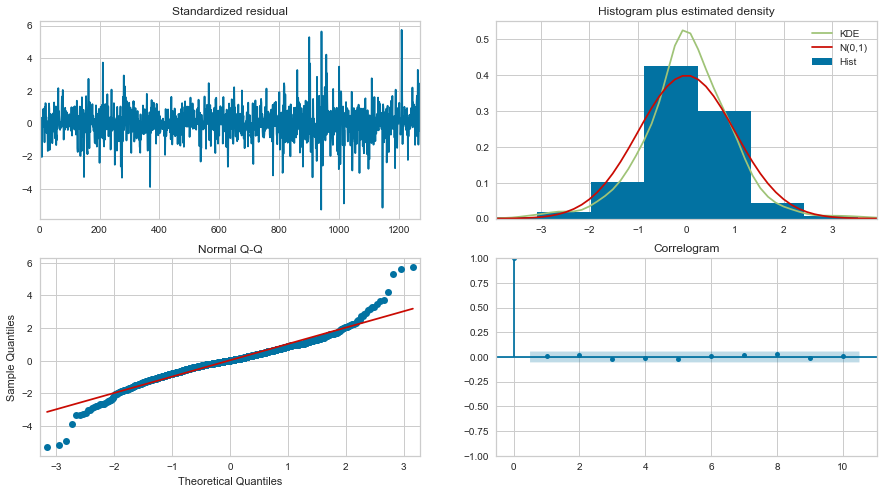

In [82]:
## Using the auto_arima to find out the p, q, and d parameters for the ARIMA model.

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

#### The top left standardized residual errors appear to have a uniform variance and fluctuate around a mean of zero. <br> The next top Right density plot suggests a normal distribution with a mean of zero.<br> The bottom left shows that the red line is perfectly aligned with almost all the dots.<br> And the last bottom right shows that the residual errors are not autocorrelated.<br> From above summary results, it is clear that ARIMA model finds the optimal order which is (0,1,0), it means p =0,d=1,q=0.

In [83]:
## lets build the ARIMA model

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(0,1,0))  
model = model.fit()  
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1274
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2727.617
Date:                Tue, 14 Nov 2023   AIC                          -5453.234
Time:                        21:32:41   BIC                          -5448.085
Sample:                             0   HQIC                         -5451.300
                               - 1274                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0008   1.76e-05     45.785      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1115.74
Prob(Q):                              0.80   Pr

In [84]:
## Lets forecast for validation.

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))


train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.002
Symmetric mean absolute percentage error: 0.733


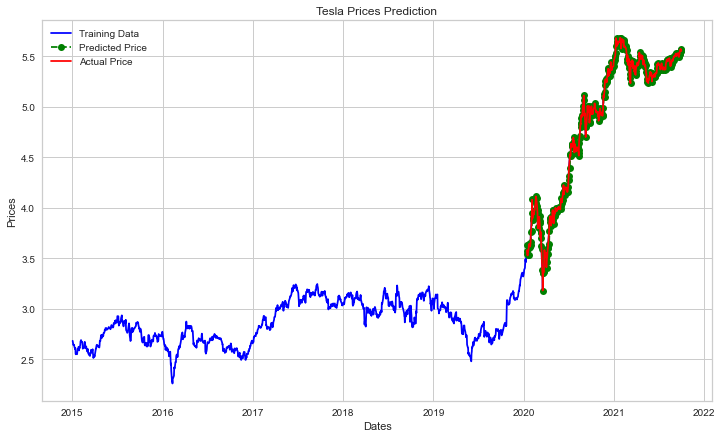

In [87]:
## Lets plot the Actual Price and Predicted price together.

plt.figure(figsize=(12,7))
plt.plot(df_log['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,1857, 300), df_log['Date'][0:1857:300])
plt.legend()

#### A line plot is created showing the Actual Price (red) compared to the rolling forecast predictions (Green). We can see the values show some trend and are in the correct scale.

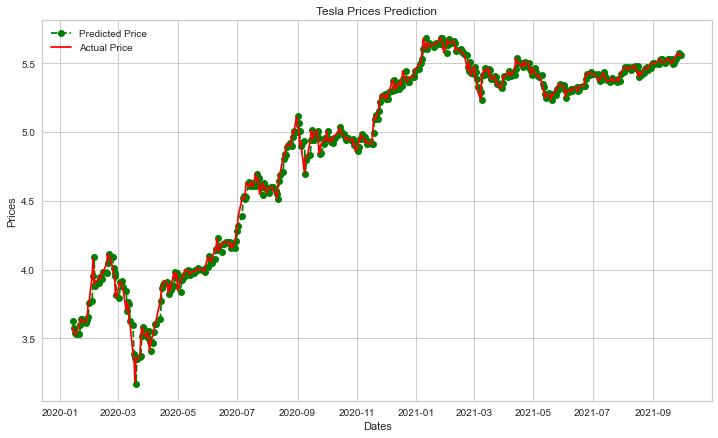

In [88]:
## Lets only show the Actual Proce and Predicted values to see the accuracy closly.

plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
#plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

#### A line plot is created showing the Actual Price (red) compared to the rolling forecast predictions (Green). We can see the values show some trend and are in the correct scale.

In [89]:
## Lets check top 10 values to see the actual and predicted data more closly.

actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

     Actual  Predicted
0  3.579660   3.626936
1  3.542890   3.576617
2  3.533180   3.540745
3  3.527340   3.533342
4  3.596764   3.528985
5  3.636814   3.599633
6  3.641438   3.639943
7  3.628457   3.641313
8  3.616345   3.626085
9  3.632133   3.612951


#### As we can see both Actual values and Predicted values are matching approximately and hence the ARIMA model is accurately predciting the stock price.

In [96]:
import sklearn.metrics as sm
## lets check how the ARIMA Model performed

print("Mean absolute error =", round(sm.mean_absolute_error(test_data, predictions), 4)) 
print("Mean squared error =", round(sm.mean_squared_error(test_data, predictions), 4)) 
print("Median absolute error =", round(sm.median_absolute_error(test_data, predictions), 4)) 
rmse = round(math.sqrt(mean_squared_error(test_data, predictions)), 4)
print('RMSE: '+str(rmse))
mape= round(np.mean(np.abs(predictions-test_data['Close'])/np.abs(test_data['Close'])), 4)
print('MAPE: '+str(mape))
print("Explain variance score =", round(sm.explained_variance_score(test_data, predictions), 4)) 
print("R2 score =", round(sm.r2_score(test_data, predictions), 4))


Mean absolute error = 0.0334
Mean squared error = 0.0023
Median absolute error = 0.023
RMSE: 0.0484
MAPE: 0.0073
Explain variance score = 0.995
R2 score = 0.995


#### As we can see that the R2 score is near 1 which means that the model is able to predict the data very well. Also mean squared error is low and the explained variance score is high which indicate that the build model is able to predict stock price.

#### Although the ARIMA model seems to be predicting stock price but lets try LSTM model also to see how LSTM model perfomed with existing data.

## Building LSTM model

In [43]:
## Import data.
Data = pd.read_csv('TSLA.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
Data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2021-09-24,248.630005,258.266663,248.186661,258.130005,258.130005,64119000
2021-09-27,257.706665,266.333344,256.436676,263.786682,263.786682,84212100
2021-09-28,262.399994,265.213318,255.393326,259.186676,259.186676,76144200


In [44]:
## Lets Split into train and test:

data_to_train = Data[:1511]
data_to_test = Data[1511:]

In [45]:
#Now, we can save the 2 csv files, Train and Test.
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')

In [46]:
## Lets check the data
Data= Data.iloc[: , 3:4]
Data.head()

,Close
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


In [47]:
## We want to create a numpy arrary not a vector 
trainig_set= Datav.iloc[:1511,:].values
test_set= Datav.iloc[1511:,:].values

#### It’s a good idea to normalize the data before model fitting. This will boost the performance.

In [48]:
# Feature scalling, Here we will do normalizatioin 
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
trainig_set_scaled= sc.fit_transform(trainig_set)

#### After scaling the training data, we must format it into a three-dimensional array for use in our LSTM model.

In [49]:
# Create a data structure with 60 timesteps and 1 output
X_train=[] #Independent variables
y_train= [] # Dependent variables 
# I am going to append past 60 days data 
for i in range(60,1511):
    X_train.append(trainig_set_scaled[i-60:i,0]) # Appending prevois 60 days data not including 60
    y_train.append(trainig_set_scaled[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [50]:
# lETS CHECK THE SHAPE OF X_train and y_train
X_train.shape, y_train.shape

((1451, 60), (1451,))

#### We have now reshaped the data into the following format (values, time-steps, 1 dimensional output).

In [51]:
# LSMT Model needs to be 3- dimensional, so need to rehsape the x_train, y_train
# Reshaping
#numpy.reshape(array, shape, order = 'C')
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1451, 60, 1)

#### Now, it’s time to build the model. We will build the LSTM with 100 neurons and 5 hidden layers. Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [52]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
model= Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.2))

# Adding second LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fourth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fifth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100))
model.add(Dropout(rate=0.2))

# Adding the Output Layer
model.add(Dense(units=1))

# Compiling the Model
# Because we're doing regression hence mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_7 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 100)          

#### We use Dropout layers to avoid Overfitting problems, and besides that, we use the parameter “return_sequences” to determine if the layer will return a sequence compatible with a LSTM. We use “return_sequences=True” when we have a LSTM layer after

In [54]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 11s 101ms/step - loss: 0.0062
Epoch 2/100
46/46 [==============================] - 5s 100ms/step - loss: 0.0019
Epoch 3/100
46/46 [==============================] - 4s 95ms/step - loss: 0.0017
Epoch 4/100
46/46 [==============================] - 5s 104ms/step - loss: 0.0019
Epoch 5/100
46/46 [==============================] - 5s 99ms/step - loss: 0.0015
Epoch 6/100
46/46 [==============================] - 5s 98ms/step - loss: 0.0011
Epoch 7/100
46/46 [==============================] - 4s 97ms/step - loss: 0.0015
Epoch 8/100
46/46 [==============================] - 5s 98ms/step - loss: 0.0019
Epoch 9/100
46/46 [==============================] - 5s 98ms/step - loss: 0.0018
Epoch 10/100
46/46 [==============================] - 5s 101ms/step - loss: 0.0011
Epoch 11/100
46/46 [==============================] - 5s 105ms/step - loss: 9.4495e-04
Epoch 12/100
46/46 [==============================] - 5s 101ms/step - loss: 0.0013
Epoch 13/100
4

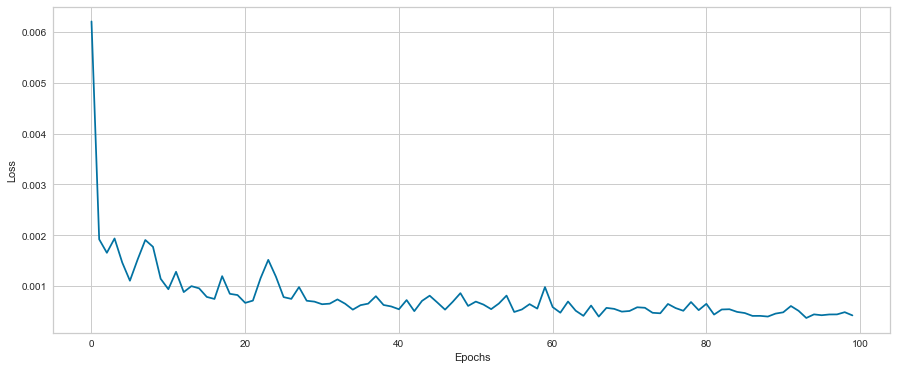

In [55]:
# Evaluating The Model
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Making Predictions

In [56]:
# GEtting ready both train and est data set
train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')

In [57]:
real_stock_price = test_data.iloc[:, 3:4].values

In [58]:
real_stock_price.shape

(188, 1)

In [59]:
test_set.shape

(188, 1)

In [60]:
# Hence we will concatenate the dataset and then scale them
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 230):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [61]:
inputs.shape

(248, 1)

In [62]:
data_total.shape

(1699,)

In [63]:
X_test.shape

(170, 60, 1)

In [64]:
#preict the model
predicted_stock_price = model.predict(X_test)

6/6 [==============================] - 2s 30ms/step


#### But before plot our predictions, we need to make a inverse_transform() in the predictions array, because we make predictions using the Scale, so our predictions are between 0 and 1.

In [65]:
# Inverse the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

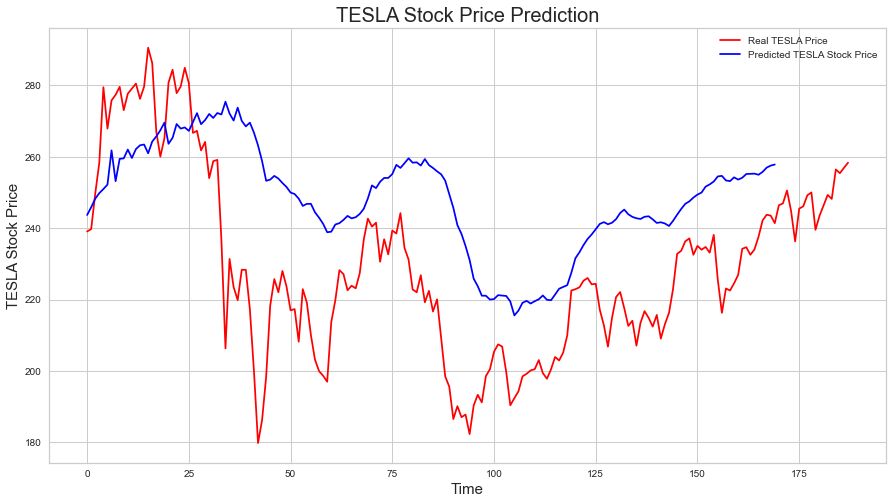

In [67]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real TESLA Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('TESLA Stock Price',fontsize=15)
plt.legend()
plt.show()

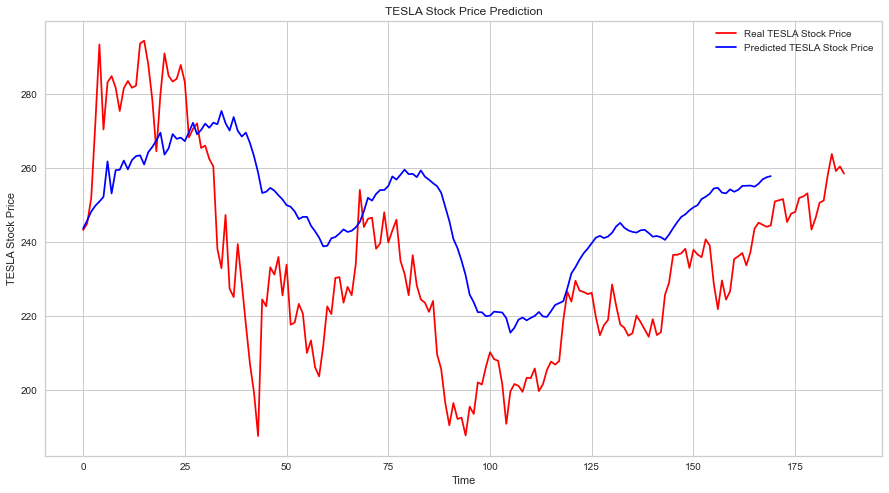

In [68]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(test_set, color='Red', label='Real TESLA Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

#### The LSTM model performed admirably, as can be seen. It can accurately follow most unusual jumps/drops; however, we can observe that the model expected (predicted) lower values than the actual stock price.

In [98]:
import sklearn.metrics as sm
## lets check how the ARIMA Model performed
n = 18
ActualData = real_stock_price[n:]
print("Mean absolute error =", round(sm.mean_absolute_error(ActualData, predicted_stock_price), 4)) 
print("Mean squared error =", round(sm.mean_squared_error(ActualData, predicted_stock_price), 4)) 
print("Median absolute error =", round(sm.median_absolute_error(ActualData, predicted_stock_price), 4)) 
rmse = round(math.sqrt(mean_squared_error(ActualData, predicted_stock_price)), 4)
print('RMSE: '+str(rmse))
mape= round(np.mean(np.abs(predicted_stock_price-ActualData)/np.abs(ActualData)), 4)
print('MAPE: '+str(mape))
print("Explain variance score =", round(sm.explained_variance_score(ActualData, predicted_stock_price), 4)) 
print("R2 score =", round(sm.r2_score(ActualData, predicted_stock_price), 4))


Mean absolute error = 26.2087
Mean squared error = 1194.2632
Median absolute error = 18.2712
RMSE: 34.5581
MAPE: 0.1244
Explain variance score = -0.3516
R2 score = -1.4312


#### As we can see that the R2 score is small and not close to 1 like ARIMA model.  Also mean squared error is low but ARIMA model values are very low and the explained variance score is negative which indicate that the LSTM model is not good with current data and ARIMA model is better in predicting stock price. 

### Conclusion:<br> Both ARIMA and LSTM model capable of predicting future stock price but the ARIMA model performed better than LSTM model with R2 score close to 1, low mean squared error, high explained variance score and lower MAPE value. Although we can use any one of this model to predict future stock prices but with the current dataset the recommended model is ARIMA.